In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scripture.functions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
ads = get_ads_frame()

In [3]:
ads.to_csv('data/ads_dummies.csv')

In [4]:
ads.columns

Index(['ad_clicks', 'ad_copy', 'ad_creation_date', 'ad_end_date', 'ad_id',
       'ad_impressions', 'ad_spend_usd', 'ad_targeting_location', 'age',
       'age_lower', 'age_upper', 'conversion_rate', 'date_order_index',
       'efficiency_clicks', 'efficiency_impressions', 'interest_expansion',
       'interests_categories', 'interests_categories_regex', 'language',
       'language_categories', 'location_categories',
       'location_categories_regex', 'placement_categories', 'placements',
       'Conservative', 'African American', 'Anti-Immigrant', 'Native American',
       'Gun Rights', 'Progressive', 'Below Age 30', 'Texas', 'Self-Defense',
       'Prison', 'Police', 'Products', 'Army', 'Geographic', 'Christianity',
       'Unknown', 'American South', 'LGBTQ', 'Islam', 'Memes and Products',
       'Patriotism', 'Memes', 'Latinx', 'Above Age 30'],
      dtype='object')

In [5]:
ads.groupby(by='African American').count()

ad_clicks  ad_copy  ad_creation_date  ad_end_date  ad_id  \
African American                                                             
0                      1926     1902              1925         1050   1818   
1                      1591     1575              1590         1323   1548   

                  ad_impressions  ad_spend_usd  ad_targeting_location   age  \
African American                                                              
0                           1924          1403                   1897  1926   
1                           1590          1327                   1589  1590   

                  age_lower      ...       Christianity  Unknown  \
African American                 ...                               
0                      1926      ...               1926     1926   
1                      1590      ...               1591     1591   

                  American South  LGBTQ  Islam  Memes and Products  \
African American                                                     
0                           1926   1926   1926                1926   
1                           1591   1591   1591                1591   

                  Patriotism  Memes  Latinx  Above Age 30  
African American                                           
0                       1926   1926    1926          1926  
1                       1591   1591    1591          1591  

[2 rows x 47 columns]

## Set values for the counts of the ads in interest groups

In [6]:
af_am_count = ads[ads['African American']==1].count()[0]

In [7]:
latinx_count = ads[ads['Latinx']==1].count()[0]

In [16]:
progressive_count = ads[ads['Progressive']==1].count()[0]

In [17]:
patriotism_count = ads[ads['Patriotism']==1].count()[0]

In [18]:
lgbtq_count = ads[ads['LGBTQ']==1].count()[0]

In [19]:
gun_count = ads[ads['Gun Rights']==1].count()[0]

In [20]:
memes_count = ads[ads['Memes']==1].count()[0]

In [21]:
values=[af_am_count,progressive_count,latinx_count,memes_count,patriotism_count,lgbtq_count,gun_count]

In [22]:
values

[1591, 631, 207, 190, 186, 120, 115]

In [23]:
interest_cats = ['African American','Progressive','Latinx','Memes',\
                                   'Patriotism','LGBTQ','Gun Rights']

Text(0.5,1,'Number of Ads in Interest Groups')

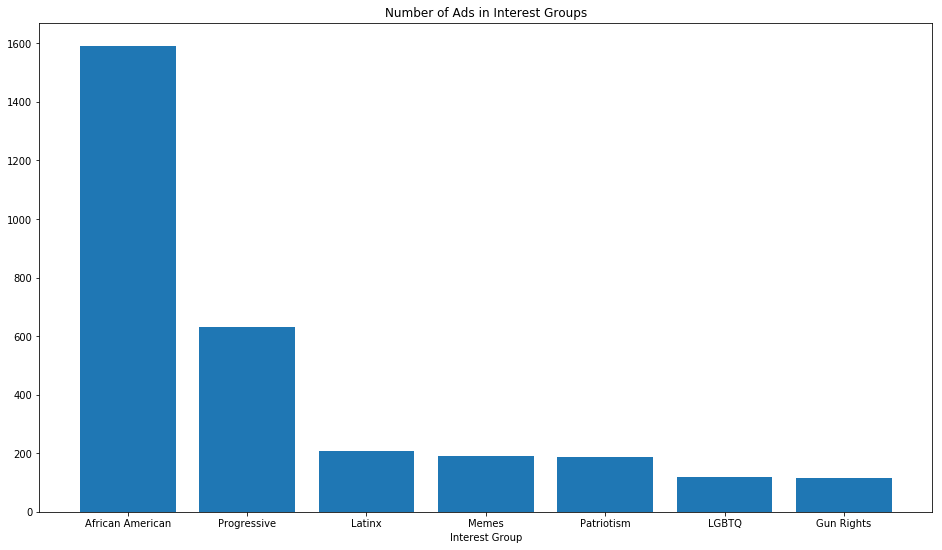

In [24]:
plt.figure(figsize=(16,9))
plt.bar(np.arange(len(values)),values, align='center')
plt.xticks(np.arange(len(values)),interest_cats)
plt.xlabel('Interest Group')
plt.title('Number of Ads in Interest Groups')
# plt.savefig('img/num_ads.png')

## Plotly

In [2]:
import plotly.plotly as py
import plotly.tools as tls
tls.set_credentials_file(username='mhichar', api_key="Iv0ES1y9TA2rBmfu9eH0")

In [63]:
import plotly.graph_objs as go

trace0 = go.Bar(
    x=interest_cats,
    y=values
)

data = [trace0]


py.iplot(data, filename = 'Number_of_ads', auto_open=False)

In [27]:
tls.get_embed('https://plot.ly/~mhichar/0')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~mhichar/0.embed" height="525" width="100%"></iframe>'

# Interest Clicks

In [28]:
interest_clicks=ads.groupby(by='interests_categories_regex').sum().sort_values\
(by='ad_clicks', ascending=False)['ad_clicks']
interest_clicks

interests_categories_regex
Latinx                                                           726984
African American                                                 603286
Unknown_African American                                         589088
African American_Progressive                                     588776
Progressive                                                      156765
Unknown_Patriotism                                               134769
                                                                 121912
Memes_Memes and Products                                          85559
American South                                                    82162
Christianity                                                      76472
LGBTQ                                                             74083
Police                                                            73145
Gun Rights                                                        57605
Unknown_African American_Progressive 

In [29]:
af_am_clicks = ads[ads['African American']==1].sum()[0]
latinx_clicks = ads[ads['Latinx']==1].sum()[0]
progressive_clicks = ads[ads['Progressive']==1].sum()[0]
pat_clicks = ads[ads['Patriotism']==1].sum()[0]
memes_clicks = ads[ads['Memes']==1].sum()[0]
american_south_clicks = ads[ads['American South']==1].sum()[0]
chris_clicks = ads[ads['Christianity']==1].sum()[0]

In [37]:
clicks_values=[af_am_clicks,progressive_clicks,latinx_clicks,pat_clicks,\
               memes_clicks,american_south_clicks,chris_clicks]

In [38]:
clicks_values

[1870272, 856381, 727003, 162903, 99515, 88887, 78134]

FileNotFoundError: [Errno 2] No such file or directory: 'img/.png'

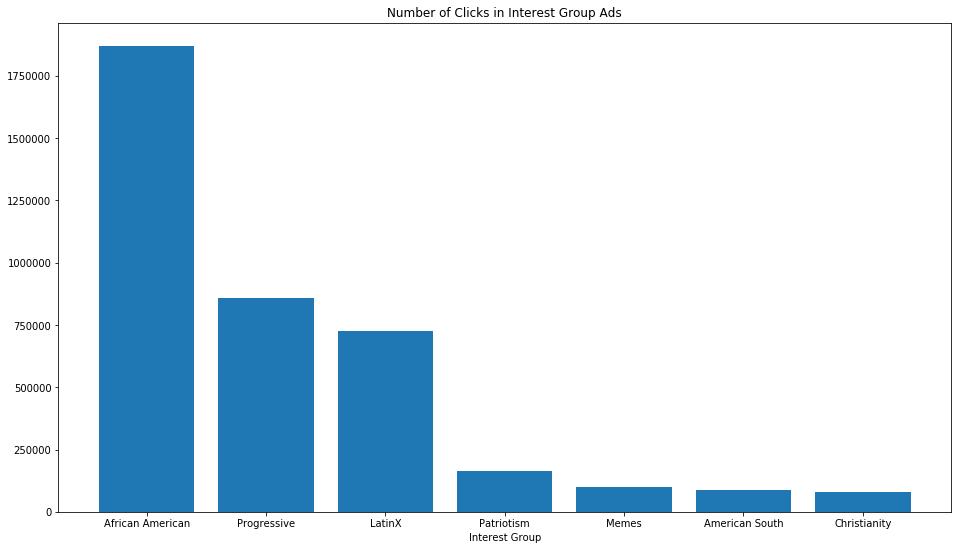

In [39]:
plt.figure(figsize=(16,9))
plt.bar(np.arange(len(clicks_values)),clicks_values, align='center')
plt.xticks(np.arange(len(values)),['African American','Progressive','LatinX','Patriotism','Memes',\
                                  'American South','Christianity'])
plt.xlabel('Interest Group')
plt.title('Number of Clicks in Interest Group Ads')
plt.savefig('img/')

In [3]:
Interest_list = ['African American','LatinX','Progressive','Patriotism','Memes',\
                                  'American South','Christianity']

## Interest Clicks Plotly

In [64]:
interest_trace_0 = go.Bar(
    x = Interest_list,
    y = clicks_values)

data1 = [interest_trace_0]

py.iplot(data1, filename = 'Interest_clicks', auto_open=False)

In [42]:
tls.get_embed('https://plot.ly/~mhichar/1')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~mhichar/1.embed" height="525" width="100%"></iframe>'

# Interest Spending 

In [4]:
interest_spend=ads.groupby(by='interests_categories_regex').sum().sort_values\
(by='ad_spend_usd', ascending=False)['ad_spend_usd']
interest_spend

NameError: name 'ads' is not defined

In [47]:
af_am_spend = ads[ads['African American']==1].sum()['ad_spend_usd']
pat_spend = ads[ads['Patriotism']==1].sum()['ad_spend_usd']
progressvie_spend = ads[ads['Progressive']==1].sum()['ad_spend_usd']
lgbtq_spend = ads[ads['LGBTQ']==1].sum()['ad_spend_usd']
isla_spend = ads[ads['Islam']==1].sum()['ad_spend_usd']
chris_spend = ads[ads['Christianity']==1].sum()['ad_spend_usd']
am_south = ads[ads['American South']==1].sum()['ad_spend_usd']
gun_spend = ads[ads['Gun Rights']==1].sum()['ad_spend_usd']
latinx_spend = ads[ads['Latinx']==1].sum()['ad_spend_usd']
meme_spend = ads[ads['Memes']==1].sum()['ad_spend_usd']

In [57]:
interest_spend = [af_am_spend,progressvie_spend,pat_spend,lgbtq_spend,isla_spend,\
                  am_south,gun_spend,chris_spend,latinx_spend,meme_spend]

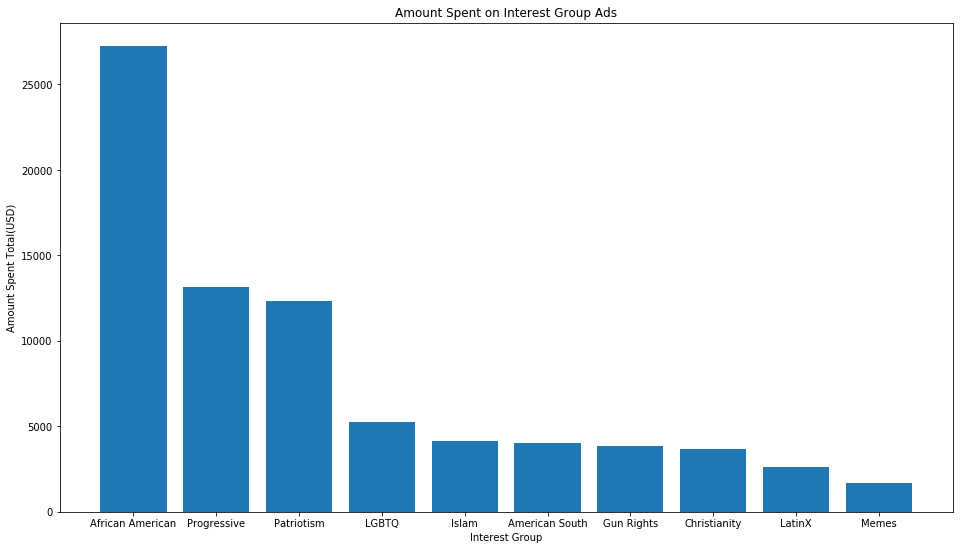

In [58]:
plt.figure(figsize=(16,9))
plt.bar(np.arange(len(interest_spend)),interest_spend, align='center')
plt.xticks(np.arange(len(interest_spend)),interest_spend_list)
plt.xlabel('Interest Group')
plt.ylabel('Amount Spent Total(USD)')
plt.title('Amount Spent on Interest Group Ads');

## Interest Spending Plotly

In [59]:
interest_spend_list = ['African American','Progressive','Patriotism','LGBTQ',\
                                           'Islam','American South','Gun Rights','Christianity','LatinX','Memes']

In [1]:
interest_spend_trace = go.Bar(
    x = interest_spend_list,
    y = interest_spend)
interest_spend_data = [interest_spend_trace]

py.plot(interest_spend_data, filename = 'Interest_spending', auto_open=False)

NameError: name 'go' is not defined

In [61]:
tls.get_embed('https://plot.ly/~mhichar/4')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~mhichar/4.embed" height="525" width="100%"></iframe>'